# Descripción del proyecto
Nuestra tarea en este proyecto es ayudar a optimizar los gastos de marketing.

Contamos con:
- registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
- archivo de volcado con todos los pedidos del período;
- estadísticas de gastos de marketing.

Lo que vamos a investigar es lo siguiente:
- cómo la gente usa el producto;
- cuándo empiezan a comprar;
- cuánto dinero trae cada cliente;
- cuándo pagan.

# Descripción de los datos
La tabla visits (registros del servidor con datos sobre las visitas al sitio web):
- Uid: identificador único del usuario;
- Device: dispositivo del usuario;
- Start Ts: fecha y hora de inicio de la sesión;
- End Ts: fecha y hora de término de la sesión;
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La tabla orders (datos sobre pedidos):
- Uid: identificador único del usuario que realiza un pedido;
- Buy Ts: fecha y hora del pedido;
- Revenue: ingresos de Y.Afisha de este pedido.

La tabla costs (datos sobre gastos de marketing):
- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

# Paso 1. Descargar los datos y prepararlos para el análisis
Vamos a almacenar los datos de visitas, pedidos y gastos en variables, optimizándolos los datos para el análisis. Revisaremos que cada columna contenga el tipo de datos correcto.

Rutas de archivos:

- /datasets/visits_log_us.csv

- /datasets/orders_log_us.csv

- /datasets/costs_us.csv

Primero, importemos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime

Ahora, revisemos y optimicemos los datos de la tabla de visitas:

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


Lo primero que vemos es que los nombres de las columnas tienen mayúsculas y espacios en blanco. Los corregiremos luego de la optimización. Revisemos ahora los valores de la columna Device

In [3]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

Vemos que solo hay dos valores en la columna, en ese caso convertiremos el tipo de dato de oject a category. Sabemos que las columnas Start Ts y End Ts deben ser del tipo datetime.

Vamos a cargar de nuevo el archivo, esta vez haciendo la conversión de ambos tipos de forma conjunta con los parámetros dtype y parse_dates, y a revisar como cambian los valores respecto al DataFrame original

In [4]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    nrows=500,
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'],
)

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    category      
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 16.5 KB


Pasamos de 113.1 a 16.5 KB, se redujo el tamaño en un 85%, ¡una gran diferencia!. Vamos a repetir este análisis con las otras dos tablas. 

In [5]:
orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


Aquí solo tenemos que cambiar tipo de dato de Buy Ts a datetime

In [6]:
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    nrows=500,
    parse_dates=['Buy Ts']
)

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   500 non-null    datetime64[ns]
 1   Revenue  500 non-null    float64       
 2   Uid      500 non-null    uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 11.8 KB


De 45 a 11.8 KB, eso significa que lo hicimos 4 veces más chico con solo cambiar los datos de una columna, ¡eso si que es optimizar!

Vamos por último con la tabla de costos

In [7]:
costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


Solo tenemos que cambiar a datetime la columna dt para optimizar esta tabla

In [8]:
costs = pd.read_csv(
    '/datasets/costs_us.csv',
    nrows=500,
    parse_dates=['dt']
)

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  500 non-null    int64         
 1   dt         500 non-null    datetime64[ns]
 2   costs      500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


Nuestra optimización está lista. Ahora, vamos a descargar las tablas completas y a corregir los nombres de las columnas de visits y orders

In [9]:
visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']
)

visits = visits.rename(columns={
    'Device': 'device',
    'End Ts': 'end_ts',
    'Source Id': 'source_id',
    'Start Ts': 'start_ts',
    'Uid': 'uid'
})

print(visits.columns)
visits.info(memory_usage='deep')

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


En la tabla orders, se apreció en las últimas partes del análisis que el rango de fechas entre la primera y última compra no coincide con el rango del primer y último gasto de marketing y que esto coincide con una única compra realizada el día primero de Junio del año 2018. Por ese motivo, como es una única compra que no representa información relevante sobre ese período de tiempo, vamos a excluirlo de la tabla

In [10]:
orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts']
)

orders = orders.rename(columns={
    'Buy Ts': 'buy_ts',
    'Revenue': 'revenue',
    'Uid': 'uid'
}
)

orders = orders.query('buy_ts < "2018-06-01"')

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50414 non-null  datetime64[ns]
 1   revenue  50414 non-null  float64       
 2   uid      50414 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [11]:
costs = pd.read_csv(
    '/datasets/costs_us.csv',
    parse_dates=['dt']
)

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Nuestras tablas están optiizadas y descargadas. ¡Vamos ahora a analizar datos!

# Paso 2. Informes y métricas
Analizaremos tabla por tabla, buscando responder preguntas específicas que nos permitan determinar como optimizar los gastos de marketing.
## Producto:
Comencemos analizando la tabla visits. para responder a las siguientes preguntas:
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día?
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios y las usuarias regresan?

Comencemos por ver las primeras 10 filas del archivo

In [12]:
visits.head(10)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


### ¿Cuántas personas lo usan cada día, semana y mes?

Ahora, vamos a evaluar la actividad de usuario, y calculando el DAU, WAU y MAU

In [13]:
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

print('El MAU es: ', int(mau_total))
print('El WAU es: ', int(wau_total))
print('El DAU es: ', int(dau_total))

El MAU es:  23228
El WAU es:  5621
El DAU es:  907


- Cada día, hay un promedio de 907 usuarios activos.
- Semanalmente, tenemos un promedio de 5621 usuarios activos.
- Al mes, el promedio es de 23228 usuarios activos.

### ¿Cuántas sesiones hay por día?

Vamos a ver cuantas sesiones hay por día, semana y mes, por medio de gráficas para que sea más visual

<AxesSubplot:title={'center':'Sesiones diarias'}, xlabel='session_date'>

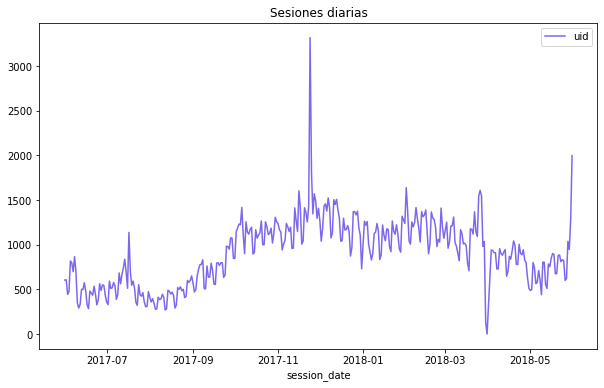

In [14]:
dayly_data= visits.groupby('session_date').agg({'uid': 'nunique'})
dayly_data.plot(figsize=(10, 6), color='mediumslateblue', title='Sesiones diarias')

<AxesSubplot:title={'center':'Sesiones por semana'}, xlabel='session_week'>

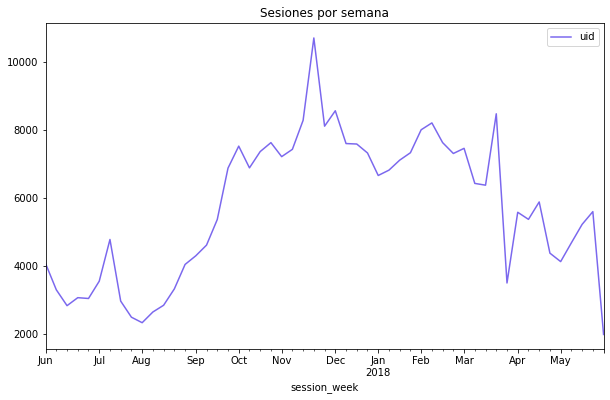

In [15]:
weekly_data = visits.groupby('session_week').agg({'uid': 'nunique'})
weekly_data.plot(figsize=(10, 6), color='mediumslateblue', title='Sesiones por semana')

<AxesSubplot:title={'center':'Sesiones por mes'}, xlabel='session_month'>

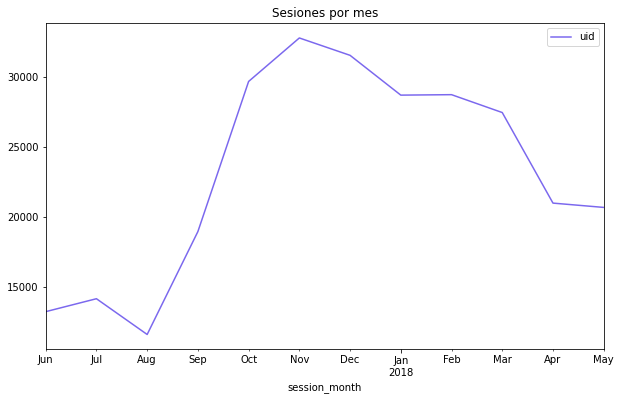

In [16]:
monthly_data = visits.groupby('session_month').agg({'uid': 'nunique'})
monthly_data.plot(figsize=(10, 6), color='mediumslateblue', title='Sesiones por mes')

Encontremos ahora las sesiones por día, y la duración de estas

In [17]:
sessions_per_user = visits.groupby(['session_year', 'session_month', 'session_date']).agg({'uid':['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('El número de sesiones promedio por día es de: ', int(sessions_per_user['n_sessions'].mean()))

El número de sesiones promedio por día es de:  987


Vemos que el número promedio de sesiones por día es de 987. Sin embargo, en las gráficas podemos ver que hay un pico de sesiones a finales de noviembre del 2017 y un valle a finales de marzo del 2018. Vamos a ver como fue la distribución de las sesiones por día durante los meses del año.

n_sessions       917.990654
n_users          845.280374
sess_per_user      1.079357
dtype: float64


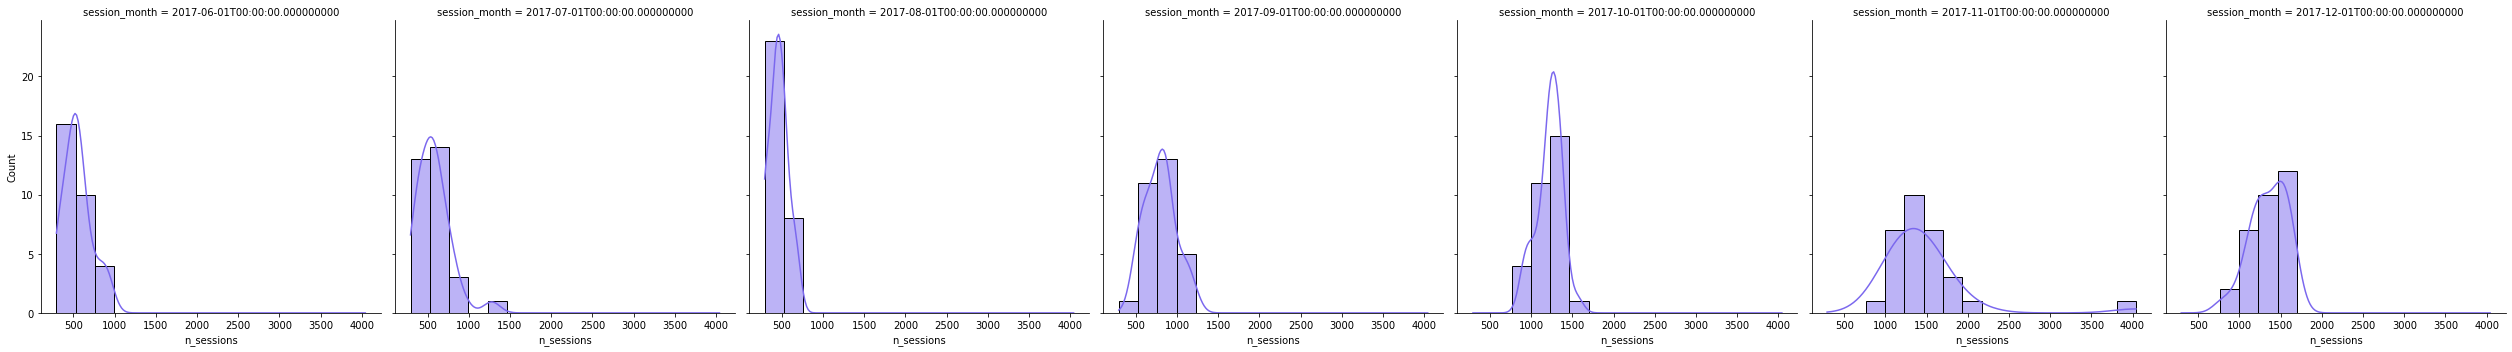

In [18]:
sessions_per_user_2017 = sessions_per_user.query('session_year == 2017')
sns.displot(data=sessions_per_user_2017, x='n_sessions', col='session_month', kde=True, color='mediumslateblue')
print(sessions_per_user_2017.mean())

n_sessions       1086.333333
n_users           997.460000
sess_per_user       1.086183
dtype: float64


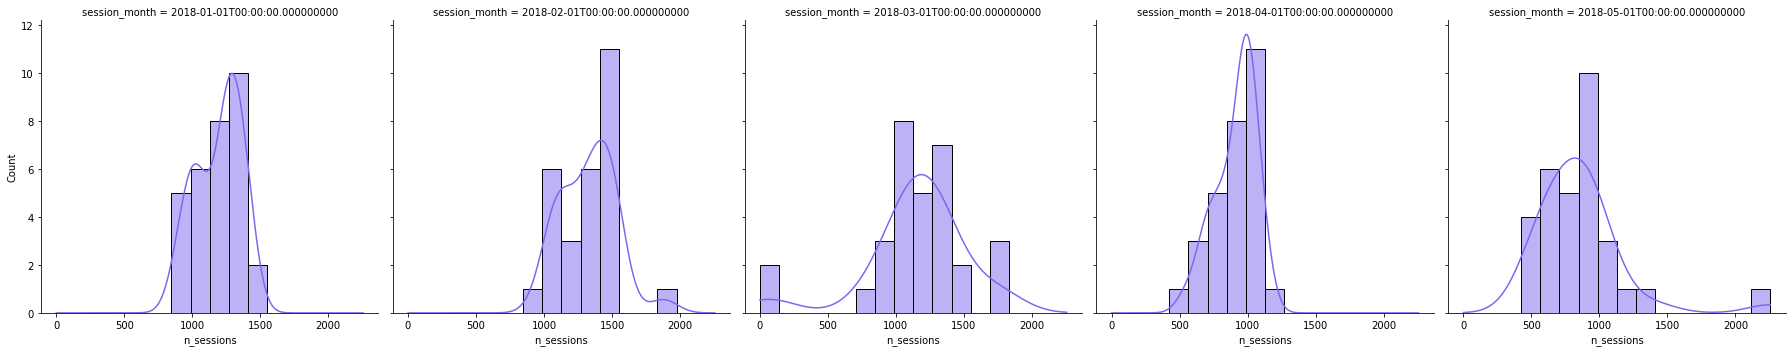

In [19]:
sessions_per_user_2018 = sessions_per_user.query('session_year == 2018')
sns.displot(data=sessions_per_user_2018, x='n_sessions', col='session_month', kde=True, color='mediumslateblue')
print(sessions_per_user_2018.mean())

Podemos ver que, efectivamente, en lo que va de 2018 la cantidad de sesiones y usuarios promedio es mayor que la de todo el 2017, pero la sesión promedio por usuario se mantiene casi igual.

### ¿Cuál es la duración de cada sesión?
Veamos como fue la distribución de la duración de todas las sesiones:

<AxesSubplot:>

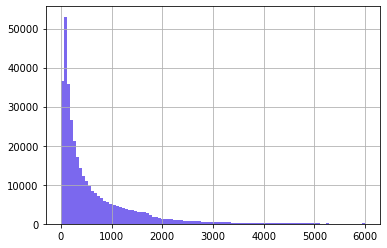

In [20]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins=100, range=(0, 6000), color='mediumslateblue')

En vista de que la distribución no es normal, Encontremos el ASL calculando la mediana en lugar de la media

In [21]:
asl = visits['session_duration_sec'].median()
print('La moda para la duración de las sesiones es de:', int(asl), 'segundos.')

La moda para la duración de las sesiones es de: 300 segundos.


Tenemos que la mediana para la duración de la sesión es de 300 segundos. Veamos ahora cuántos usuarios regresan a la aplicación calculando el sticky factor semanal y mensual

In [22]:
sticky_wau = (dau_total / wau_total) * 100
sticky_mau = (dau_total / mau_total) * 100
print('El porcenta de usuarios activos por semana es del', float(sticky_wau), '%')
print('El porcenta de usuarios activos por semana es del', float(sticky_mau), '%')

El porcenta de usuarios activos por semana es del 16.151540637823956 %
El porcenta de usuarios activos por semana es del 3.908969652437603 %


### ¿Con qué frecuencia los usuarios y las usuarias regresan?

Ahora, vamos a realizar un análisis de cohortes para calcular tasa de retención. Lo realizaremos por cohortes mensuales según la fecha de la primera sesión

In [23]:
first_visits = visits.groupby('uid')['session_month'].min().reset_index().rename(columns={'session_month': 'first_session_month'})
first_visits.head()

,uid,first_session_month
0,11863502262781,2018-03-01
1,49537067089222,2018-02-01
2,297729379853735,2017-06-01
3,313578113262317,2017-09-01
4,325320750514679,2017-09-01


In [24]:
retention = visits.merge(first_visits, on='uid', how='left')
retention.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01


Ahora que tenemos las cohortes, vamos a calcular los meses para cada cohorte desde su creación

In [25]:
retention["months_diff"] = retention["session_month"].dt.month - retention["first_session_month"].dt.month
retention["months_diff"] += 12*(retention["session_month"].dt.year - retention["first_session_month"].dt.year)
retention.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_month,months_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-01,0


finalmente, calculemos la cantidad de usuarios que permanecen activos en cada cohorte durante el ciclo de vida de la misma

In [26]:
retention['cohort_users'] = retention['uid'].sum()
retention['retention'] = retention['uid'] / retention['cohort_users'] 
retention_table = retention.pivot_table(
    index="first_session_month",
    columns="months_diff",
    values="retention",
    aggfunc="sum"
)
retention_table.fillna("")

months_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,17947.132754,2724.00289,2048.138957,2516.129219,3037.444949,3328.513894,2969.257549,2492.570912,2332.946127,2184.759151,1785.087391,1753.114539
2017-07-01,16718.584895,1218.950877,1275.845456,1364.801447,1512.720716,1190.230572,1062.139704,1055.406402,912.114992,639.49621,642.627357,
2017-08-01,12444.838569,1280.625167,1104.006942,1128.327493,984.505767,819.115598,671.009985,745.730794,527.364647,461.061802,,
2017-09-01,21012.887555,2328.38064,2133.398473,1460.668547,1081.89592,992.575711,1012.323357,637.77801,660.597578,,,
2017-10-01,33477.751517,3554.576181,2315.779491,1621.005266,1404.976575,1273.448987,839.271628,858.223499,,,,
2017-11-01,36421.575736,4146.765033,2337.019245,1960.758703,1495.288848,961.164069,987.097164,,,,,
2017-12-01,32738.085542,2510.33152,1584.722336,1293.42893,701.569672,724.563439,,,,,,
2018-01-01,28346.530209,2376.907696,1495.172319,777.972347,723.306973,,,,,,,
2018-02-01,27986.359734,2187.632646,819.434495,734.615497,,,,,,,,


Y ahora, vamos a expresarlo como porcentaje para mostrar la tasa de retención con un mapa de calor

<AxesSubplot:title={'center':'Cohortes: retención de usuarios/as'}, xlabel='months_diff', ylabel='first_session_month'>

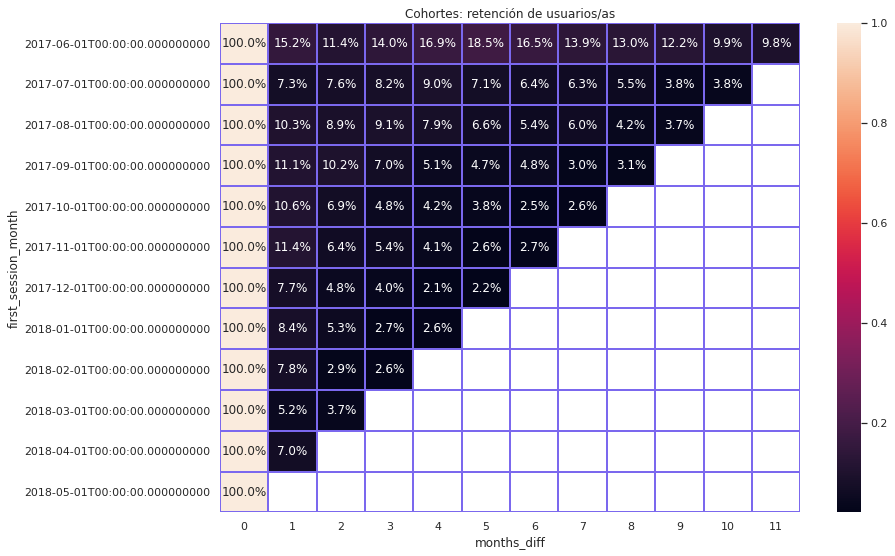

In [27]:
retention_rates = retention_table
for col in retention_rates.columns[1:]:
    retention_rates[col] = retention_rates[col] / retention_rates[0]

retention_rates[0] = retention_rates[0]/retention_rates[0]

retention_rates.fillna("")

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as')
sns.heatmap(
    retention_table, annot=True, fmt='.1%', linewidths=1, linecolor='mediumslateblue'
)

Podemos ver que la tasa de retención del primer mes es bastante baja, con un promedio del 10%, una máxima de 15.2% y una mínima del 5.2%.

La tasa de retención general más alta es la de la cohorte de Junio del 2017, y se mantiene en un rango relativamente estable hasta los dos últimos meses que cae.

La tasa de retención para el primer mes más alta la tiene la cohorte de Junio 2017 con un 15.2%, y va bajando considerablemente hasta llegar a un mínimo de 5.2% para la cohorte de Marzo 2018. Es decir, en nueve meses, la tasa de retención se redujo en 65%. Esto significa que la tasa de retención viene cayendo, por lo que hay que investigar el motivo para cambiar esto rápidamente.

# Conclusiones acerca del producto
Con estos resultados, podemos responder las preguntas relacionadas con esta tabla:
- ¿Cuántas personas lo usan cada día, semana y mes?
    - Cada día, hay un promedio de 907 usuarios activos.
    - Semanalmente, tenemos un promedio de 5621 usuarios activos.
    - Al mes, el promedio es de 23228 usuarios activos.
- ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
    - El número promedio de sesiones por día es de 987
- ¿Cuál es la duración de cada sesión?
    - la moda para la duración de la sesión es de 60 segundos
- ¿Con qué frecuencia los usuarios y las usuarias regresan?
    - El porcenta de usuarios activos por semana es del 16.151540637823956 %
    - El porcenta de usuarios activos por semana es del 3.908969652437603 %
    - La tasa de retención promedio para el primer mes es del 10%
    - La tasa de retención para el primer mes, está disminuyendo con cada nueva cohorte
    - La tasa de retención de cada cohorte disminuye a medida que pasan los meses

## Ventas:
Tenemos ya la información acerca del comportamiento de los usuarios de la aplicaicón. Veamos ahora otra métrica que nos intersa mucho para el resultado de esta investigación: cuándo y cómo compran. Para eso, analizaremos los datos con la finalidad de responder a las siguientes preguntas:
- ¿Cuándo la gente empieza a comprar según cohorte y canal de marketing?
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra por cohorte y por canal?
- ¿Cuánto dinero traen? (LTV)

Comencemos por ver las primeras 10 filas del archivo

In [28]:
orders.head(10)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


### ¿Cuándo la gente empieza a comprar según cohorte y canal de marketing?

Ahora, vamos a determinar la fecha de la primera compra y agregarla a la la tabla orders como la columna first_order_date

In [29]:
first_order_date = orders.groupby('uid')['buy_ts'].agg('min').reset_index().rename(columns={'buy_ts': 'first_order_month'})
orders = orders.merge(first_order_date, on='uid')
orders['first_order_month'] = orders['first_order_month'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01


Para determinar cuándo comienzan a comprar los clientes, vamos a unir la tabla orders con first_visits, ya que en la primera tenemos la fecha de la primera compra y en la segunda tenemos la fecha de la primera sesión. Llamaremos a la nueva tabla first_order_dif, y agregaremos la columna time_to_first_order, que nos mostrará los días que le llevó a un usuario realizar su primera compra.

In [30]:
first_order_dif = orders.merge(first_visits, on='uid')
first_order_dif['first_order_month'] = first_order_dif['first_order_month'].astype('datetime64[M]')
first_order_dif['first_session_month'] = first_order_dif['first_session_month'].astype('datetime64[M]')
first_order_dif['time_to_first_order'] = first_order_dif['first_order_month'] - first_order_dif['first_session_month']
first_order_dif.head()

,buy_ts,revenue,uid,first_order_month,first_session_month,time_to_first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0 days


In [31]:
time_to_first_order_avg = first_order_dif['time_to_first_order'].mean()
time_to_first_order_avg

Timedelta('17 days 06:38:27.644701868')

Podemos ver que el promedio para que un usuario haga su primera compra es de 17 días.

Veamos el detalle de este comportamiento por cohortes mensuales según la fuente de anuncios. Agreguemos a la tabla la columna month y la columna source_id. Vamos a convertir la columna time_to_first_order al tipo int para poder realizar operaciones matemáticas con ella. Al hacer esto, los valores de la columna se convierten de días a segundos, por lo que divideremos el resultado para que quede expresado igual en días.

In [32]:
first_order_dif['month'] = first_order_dif['buy_ts'].astype('datetime64[M]')
first_order_dif['source_id'] = visits['source_id']
first_order_dif['time_to_first_order'] = (first_order_dif['time_to_first_order'].astype('int') / 86400000000000).round()
first_order_dif

,buy_ts,revenue,uid,first_order_month,first_session_month,time_to_first_order,month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0.0,2017-06-01,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0.0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0.0,2017-06-01,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0.0,2017-06-01,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0.0,2017-06-01,3
...,...,...,...,...,...,...,...,...
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01,2017-12-01,151.0,2018-05-01,5
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0.0,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0.0,2018-05-01,3
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0.0,2018-05-01,2


#### Tiempo de conversión por fuente de anuncios

Ya podemos calcular la el tiempo promedio de conversión por fuente

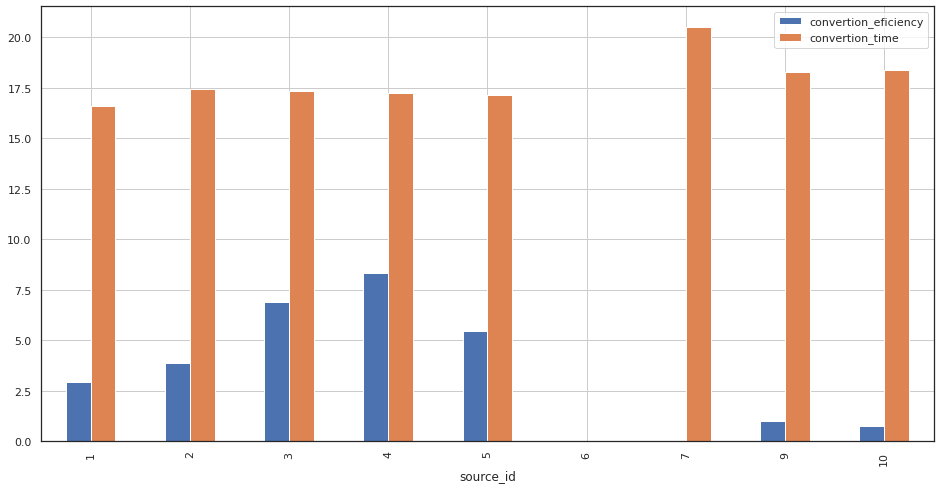

,source_id,total_users,convertion_time,convertion_eficiency
0,1,4838,16.606449,2.913326
1,2,6714,17.428954,3.852210
2,3,11993,17.351622,6.911746
3,4,14314,17.220344,8.312261
4,5,9333,17.141862,5.444566
5,6,1,0.000000,inf
6,7,6,20.500000,0.002927
7,9,1847,18.296697,1.009472
8,10,1368,18.374269,0.744519


In [33]:
convertion_time_by_source = first_order_dif.groupby("source_id").agg(
    total_users=("uid", "count"),
    convertion_time=("time_to_first_order", "mean"),
).reset_index()

convertion_time_by_source["convertion_eficiency"] = (convertion_time_by_source["total_users"] / convertion_time_by_source["convertion_time"]) / 100
convertion_time_by_source_pivot = convertion_time_by_source.pivot_table(
    index='source_id',
    values=['convertion_time', 'convertion_eficiency'],
    aggfunc='sum'
).plot(kind="bar", grid=True, figsize=(16, 8))
plt.show()
convertion_time_by_source

Creamos la columna convertion_eficiency dividiendo el número de usuarios por canal entre el tiempo promedio de conversión de cada fuente con la inención de medir cuál es más eficiente proporcionalmente, ya que no es igual tener un promedio de conversión de 17 días para 6714 clientes (como la fuente 2) que para 14314 clientes (como el caso de la fuente 4). en ese sentido, es mucho más eficiente la fuente de anunción número 4, ya que logra mantener un promedio de 17 días con un mayor número de clientes.

Podemos sacar las siguientes conclusiones del gráfico:
- La fuente con mejor tiempo de conversión promedio es la número 1
- Las fuentes con el peor tiempo promedio de conversión son las 9 y 10
- Las fuentes 2, 3, 4 y 5 tienen un tiempo promedio de conversión similar
- Las fuentes con la mejor eficiencia de conversión son la número 4 y 3, respectivamente.
- Las fuentes con la peor eficiencia de conversión son la número 1, 9 y 10, respectivamente.

#### Tiempo de conversión por cohorte

Veamos ahora el tiepo promedio de conversión por cohortes mensuales

<AxesSubplot:title={'center':'Cohortes: Tiempo promedio de conversión de usuarios/as'}, xlabel='month', ylabel='first_order_month'>

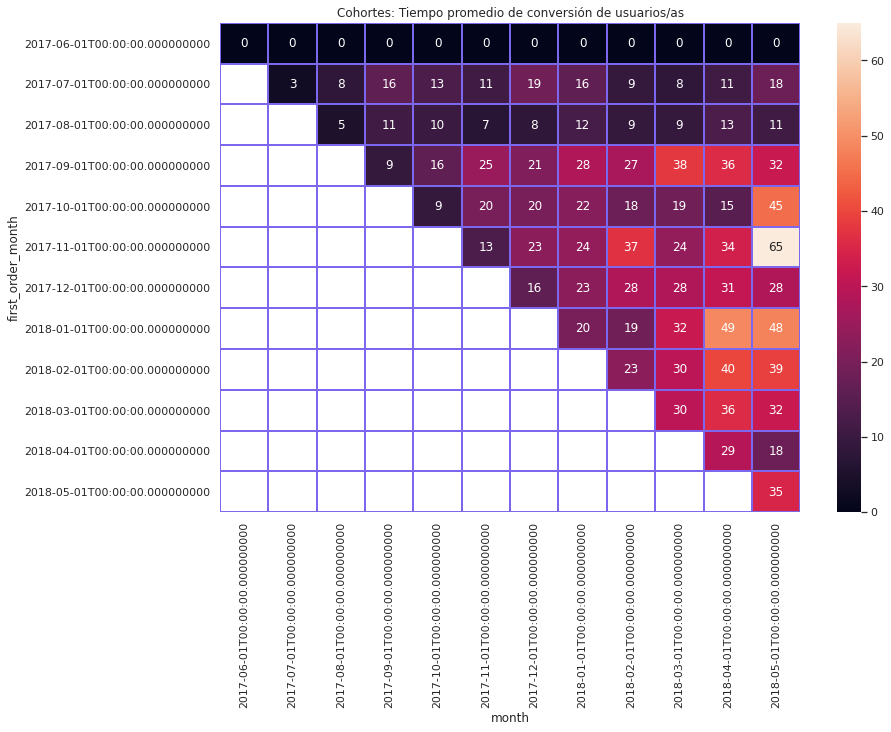

In [34]:
convertion_table = first_order_dif.pivot_table(
    index="first_order_month",
    columns="month",
    values="time_to_first_order",
    aggfunc="mean"
).round()
convertion_table.fillna("")

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: Tiempo promedio de conversión de usuarios/as')
sns.heatmap(
    convertion_table, annot=True, linewidths=1, linecolor='mediumslateblue'
)

- Podemos ver que el tiempo promedio de conversión de cada cohorte cada vez es más largo que el de la anterior

### ¿Cuántos pedidos hacen durante un período de tiempo dado?
Veamos las compras mensuales

month
2017-06-01    2354
2017-07-01    2363
2017-08-01    1807
2017-09-01    3387
2017-10-01    5679
2017-11-01    5659
2017-12-01    6218
2018-01-01    4721
2018-02-01    5281
2018-03-01    5326
2018-04-01    3273
2018-05-01    4346
Name: uid, dtype: int64


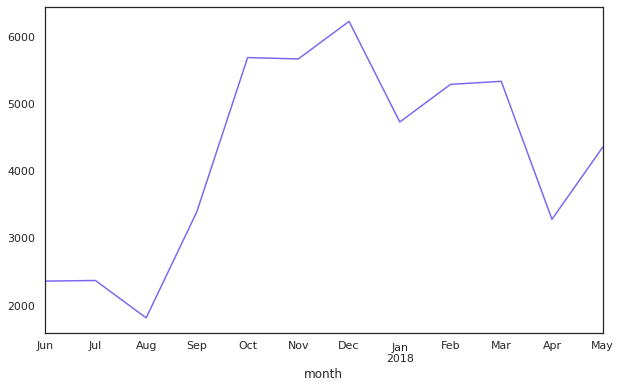

count      12.000000
mean     4201.166667
std      1511.972092
min      1807.000000
25%      3045.500000
50%      4533.500000
75%      5409.250000
max      6218.000000
Name: uid, dtype: float64

In [35]:
first_order_dif["month"] = first_order_dif["buy_ts"].astype("datetime64[M]")
monthly_orders = first_order_dif.groupby("month")["uid"].count()
print(monthly_orders)

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind="line", color='mediumslateblue')
plt.show()
monthly_orders.describe()

Podemos ver lo siguiente de este análisis:
- El mes con menor cantidad de compras tuvo 1807, y fue Agosto del 2017
- El mes con mayor cantidad de compras tuvo 6218, y fue diciembre del 2017
- El promedio de compras mensuales es de 4201

Analicemos los ingresos promedio por las compras mensuales

        month   uid  total_revenue  avg_revenue
0  2017-06-01  2354        9557.49     4.060106
1  2017-07-01  2363       12539.47     5.306589
2  2017-08-01  1807        8758.78     4.847139
3  2017-09-01  3387       18345.51     5.416448
4  2017-10-01  5679       27987.70     4.928280
5  2017-11-01  5659       27069.93     4.783518
6  2017-12-01  6218       36388.60     5.852139
7  2018-01-01  4721       19417.13     4.112927
8  2018-02-01  5281       25560.54     4.840095
9  2018-03-01  5326       28834.59     5.413930
10 2018-04-01  3273       16858.06     5.150645
11 2018-05-01  4346       20735.98     4.771279


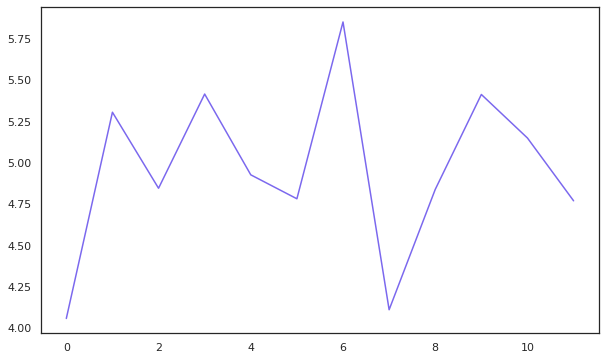

,uid,total_revenue,avg_revenue
count,12.000000,12.000000,12.000000
mean,4201.166667,21004.481667,4.956925
std,1511.972092,8441.221013,0.521265
min,1807.000000,8758.780000,4.060106
25%,3045.500000,15778.412500,4.780459
50%,4533.500000,20076.555000,4.887709
75%,5409.250000,27299.372500,5.333424
max,6218.000000,36388.600000,5.852139


In [36]:
avg_monthly_orders = first_order_dif.groupby("month").agg({"uid": "count", "revenue": "sum"}).reset_index().rename(columns={'revenue': 'total_revenue'})
avg_monthly_orders["avg_revenue"] = avg_monthly_orders["total_revenue"] / avg_monthly_orders["uid"]
print(avg_monthly_orders)

avg_monthly_orders["avg_revenue"].plot(kind="line", figsize=(10, 6), color='mediumslateblue')
plt.show()
avg_monthly_orders.describe()

Podemos concluir lo siguiente de este análisis:
- El mes con menor cantidad de ingresos totales fue agosto del 2017, con 8.758 y un ingreso promedio por usuario de 4.06
- El mes con mayor cantidad de ingresos totales fue diciembre del 2017, con 36.388 y un ingreso promedio por usuario de 5.85
- El promedio de ingresos totales por mes fue de 21.004, y el de ingresos promedios por persona de 4.95

### ¿Cuál es el tamaño promedio de compra por cohorte y por canal?

Ahora, vamos a crear cohortes mensuales, para ver el comportamiento en un marco temporal grande y comparar las compras de diferentes cohortes a fin de determinar qué cohorte o canal de marketing es más efectivo.

Comencemos agregando a nuestra tabla la columna source_id, nomth y first_order_month.

In [37]:
orders['source'] = visits['source_id']
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_month'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_order_month,source,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,4,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,5,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,9,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01


#### Tamaño promedio de compra por usuario por cohorte

Ahora, calculemos el tamaño promedio de compra por usuario para cada cohorte

In [38]:
cohorts_revenue = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid': 'nunique'})
cohorts_revenue['revenue_per_user'] = cohorts_revenue['revenue'] / cohorts_revenue['uid']
cohorts_revenue.pivot_table(
    index='first_order_month',
    columns='order_month',
    values='revenue_per_user',
    aggfunc='mean'
).fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.09541,17.7068,35.764815,23.506591,22.207761,31.011935,25.033191,19.29569,27.233556,25.681333,9.804151
2017-07-01,,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846
2017-08-01,,,5.276518,11.148793,11.851321,12.182955,16.92125,12.139063,9.620333,12.610455,21.07,8.307419
2017-09-01,,,,5.644529,22.188385,13.4452,138.669189,19.881538,26.095,27.437121,16.961351,11.044651
2017-10-01,,,,,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701
2017-11-01,,,,,,5.154683,7.339054,6.786583,12.51066,7.457284,4.580833,7.564839
2017-12-01,,,,,,,4.738191,7.816575,39.366019,48.135052,27.4314,23.518413
2018-01-01,,,,,,,,4.135636,8.721228,12.365542,11.199767,4.699556
2018-02-01,,,,,,,,,4.156987,8.61,4.942414,6.941026


Esta tabla dinámica nos muestra los cambios en los ingresos por usuario para las cohortes por cada mes y a lo largo del tiempo.

Ordenémoslo para ver los cambios en los ingresos por usuario en relación con el tiempo pasado desde la primera compra, y vamos a visualizarlo mejor con un mapa de calor.

<AxesSubplot:title={'center':'Tamaño promedio de compra por cliente'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

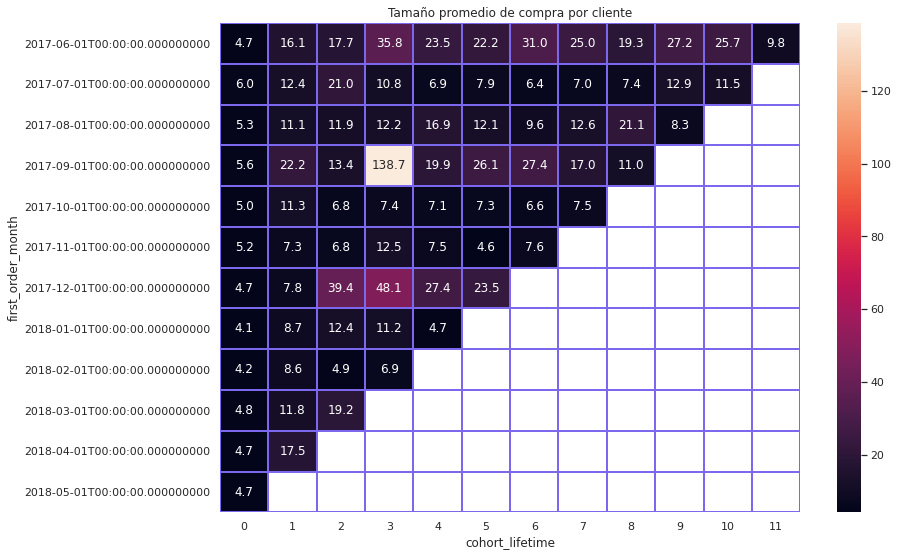

In [39]:
orders_grouped_by_cohorts = cohorts_revenue.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean'
)

plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por cliente')
sns.heatmap(
    orders_grouped_by_cohorts_pivot,
    annot=True,
    fmt='.1f',
    linewidth=1,
    linecolor='mediumslateblue'
)

In [40]:
print('El tamaño promedio de compra es de', orders_grouped_by_cohorts['revenue_per_user'].mean())

El tamaño promedio de compra es de 14.878613335688675


#### Tamaño promedio de compra por cohorte

Vamos a calcular el tamaño promedio de compra por cohorte

first_order_month
2017-06-01    21.505471
2017-07-01    10.021397
2017-08-01    12.112811
2017-09-01    31.262996
2017-10-01     7.354802
2017-11-01     7.341991
2017-12-01    25.167608
2018-01-01     8.224346
2018-02-01     6.162607
2018-03-01    11.957455
2018-04-01    11.096335
2018-05-01     4.660562
Name: revenue_per_user, dtype: float64


<AxesSubplot:xlabel='first_order_month'>

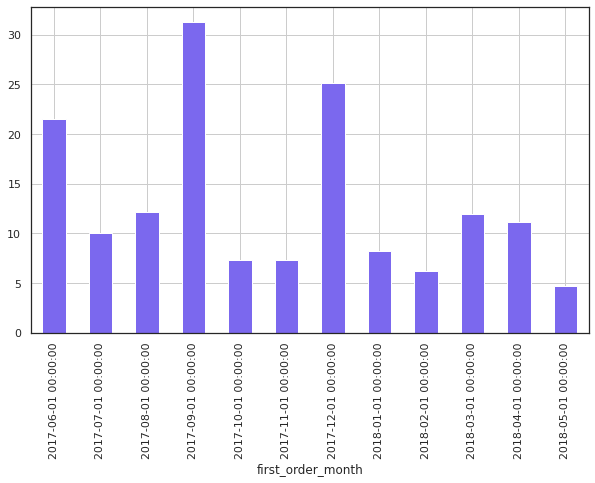

In [41]:
cohort_mean_revenue = orders_grouped_by_cohorts.groupby('first_order_month')['revenue_per_user'].mean()
print(cohort_mean_revenue)
cohort_mean_revenue.plot(kind='bar', grid=True, figsize=(10, 6), color='mediumslateblue')

- Podemos ver que el promedio de compra general es de $14.73

- También se aprecia claramente en el gráfico que la cohorte con mayor tamaño promedio de compra es la de septiembre del 2017, seguida por las de diciembre y junio 2017

- La cohorte con menor tamaño promedio de compra es la de febrero del 2018. No consideramos las cohortesde mayo y junio del 2018 ya que solo tienen un mes de vida.

#### Total de compras por cohorte

Ahora, calculemos los totales de compras para cada cohorte

   first_session_month  total_users  total_revenue  avg_revenue_per_user
0           2017-06-01         6397       40026.05              6.257003
1           2017-07-01         3545       17812.11              5.024573
2           2017-08-01         2638       13461.87              5.103059
3           2017-09-01         4346       33682.56              7.750244
4           2017-10-01         6233       27857.69              4.469387
5           2017-11-01         5983       24426.72              4.082688
6           2017-12-01         5236       31157.85              5.950697
7           2018-01-01         3864       14546.82              3.764705
8           2018-02-01         3866       15061.29              3.895833
9           2018-03-01         3545       13770.16              3.884389
10          2018-04-01         2285        9882.55              4.324967
11          2018-05-01         2476       10368.11              4.187443


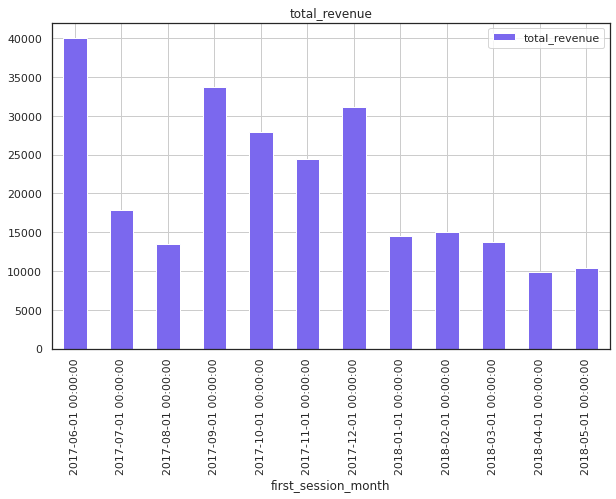

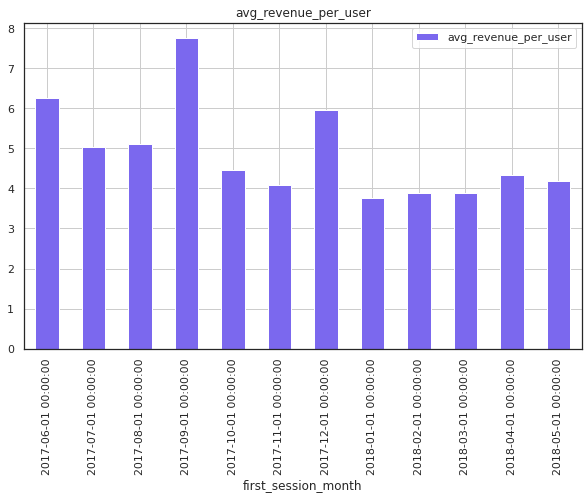

In [42]:
total_revenue_by_cohort = first_order_dif.groupby("first_session_month").agg({"uid": "count", "revenue": "sum"}).reset_index().rename(columns={'uid': 'total_users', 'revenue': 'total_revenue'})
total_revenue_by_cohort["avg_revenue_per_user"] = total_revenue_by_cohort["total_revenue"] / total_revenue_by_cohort["total_users"]
print(total_revenue_by_cohort)
total_revenue_by_cohort.pivot_table(
    index='first_session_month',
    values='total_revenue',
).plot(title='total_revenue', kind='bar', grid=True, figsize=(10, 6), color='mediumslateblue')
plt.show()
total_revenue_by_cohort.pivot_table(
    index='first_session_month',
    values='avg_revenue_per_user',
).plot(title='avg_revenue_per_user', kind='bar', grid=True, figsize=(10, 6), color='mediumslateblue')
plt.show()

Vemos que la cohorte que ha generado mayores ingresos totales es la de Junio del 2017, con 40.026. Esto tiene sentido considerando que es la cohorte más antigua. Es seguida por la de septiembre 2017 con 33.682 y diciembre del 2017, con 31.158

Las cohortes de abril y mayo del 2018 son las que han generado menores ingresos totales, con 9.882 y 10.368, respectivamente. También de esperarse ya que son las cohortes más recientes con apenas 2 y 1 mes respectivamente. Sin embargo, y en ese sentido, vemos que algo bueno se hizo en mayo, ya que en un solo mes, tiene mayor cantidad de ingresos totales que abril con 2 meses de vida.

En cuanto al tamaño promedio de compra por usuario por cohorte, tenemos el más alto en la cohorte de septiembre del 2017 con 7.75, y el más bajo en la cohorte de enero del 2018 con 3.76

#### Tamaño total y promedio de compra por canal

Veamos qué canal es más rentable, calculando el total de ingresos mensuales y el tamaño de compra promedio de cada usuario

   source_id  total_users  total_revenue  avg_revenue_per_user
0          1         4838       25873.26              5.347925
1          2         6714       32737.00              4.875931
2          3        11993       58674.42              4.892389
3          4        14314       73860.73              5.160034
4          5         9333       45600.74              4.885968
5          6            1           6.11              6.110000
6          7            6          23.22              3.870000
7          9         1847        8963.16              4.852821
8         10         1368        6315.14              4.616330


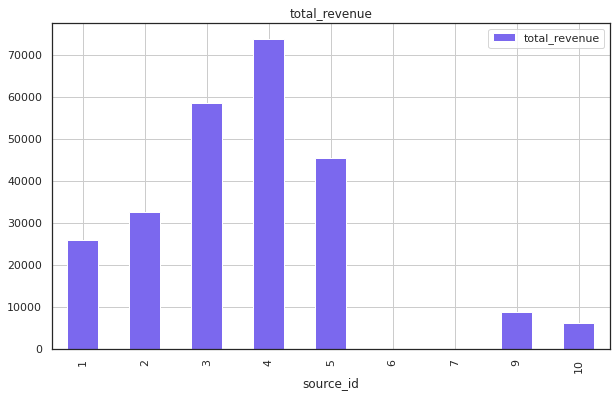

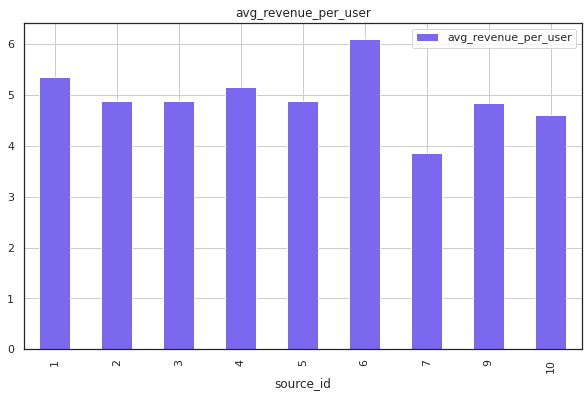

In [43]:
avg_revenue_by_source = first_order_dif.groupby("source_id").agg({"uid": "count", "revenue": "sum"}).reset_index().rename(columns={'uid': 'total_users', 'revenue': 'total_revenue'})
avg_revenue_by_source["avg_revenue_per_user"] = avg_revenue_by_source["total_revenue"] / avg_revenue_by_source["total_users"]
print(avg_revenue_by_source)
avg_revenue_by_source.pivot_table(
    index='source_id',
    values='total_revenue',
).plot(title='total_revenue', kind='bar', grid=True, figsize=(10, 6), color='mediumslateblue')
plt.show()
avg_revenue_by_source.pivot_table(
    index='source_id',
    values='avg_revenue_per_user',
).plot(title='avg_revenue_per_user', kind='bar', grid=True, figsize=(10, 6), color='mediumslateblue')
plt.show()

Considerando el ingreso promedio por usuario: 
- La fuente de anuncios que genera más ingresos es la número 1. No consideramos la número 6, ya que solo tiene 1 cliente.
- Las que generan menos ingresos son la 9 y la 10

En cuanto a ingresos totales:
- La fuente que genera más ingresos es la número 4.
- Las que generan menos ingresos son las número 9 y 10.

### ¿Cuánto dinero traen? (LTV)

Calclemos ahora el LTV

Veamos la distribución de las fechas de pedido en la tabla orders:

In [44]:
orders['buy_ts'].describe()

/tmp/ipykernel_325/1440822320.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['buy_ts'].describe()


count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

Vemos que la primera compra se realizó el 1 de junio del 2017 y la última, el 1 de junio del 2018.

Hagamos lo mismo con la tabla costs

In [45]:
costs['dt'].describe()

/tmp/ipykernel_325/3241683431.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costs['dt'].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

La fecha del primer pago coincide con la de la primera compra, pero la última no. El último pago en marketing se hizo el 31 de Mayo del 2018, y la última compra fue el 1 de Junio del 2018. lo que haremos para que coincida es sacar esa última compra haciendo un slice

In [46]:
orders_range = orders.query('buy_ts < "2018-06-01"')
orders_range['buy_ts'].describe()

/tmp/ipykernel_325/35293414.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_range['buy_ts'].describe()


count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

¡Ahora los rangos de fecha coinciden! Sigamos con el análisis. Ya tenemos el mes de la primera compra en la tabla orders. Vamos a verla

In [47]:
orders_range.head()

,buy_ts,revenue,uid,first_order_month,source,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,4,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,5,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,9,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01


Calculemos el número de nuevos clientes para cada mes

In [48]:
cohort_sizes = orders_range.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index().rename(columns={'uid': 'n_buyers'})
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Fusionamos las tablas

In [49]:
orders_range = orders_range.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
report = orders_range.merge(cohort_sizes, on='first_order_month', how='left')
report.head()

,first_order_month,order_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


En la información suministrada no se proporciona un margin rate, por eso, calcularemos uno estimado dividiendo los ingresos entre el número de clientes, y sacando el promedio a este resultado. El valor obtenido lo usaremos para calcular el LVT.

In [50]:
margin_rate = (report['revenue'] / report['n_buyers']).mean()
margin_rate

1.120532306024111

Tenemos un margin rate del 112%. Ahora calculemos el gross profit y el LTV

  first_order_month order_month  revenue  n_buyers            gp  age  \
0        2017-06-01  2017-06-01  9557.49      2023  10709.476310    0   
1        2017-06-01  2017-07-01   981.82      2023   1100.161029    1   
2        2017-06-01  2017-08-01   885.34      2023    992.052072    2   
3        2017-06-01  2017-09-01  1931.30      2023   2164.084043    3   
4        2017-06-01  2017-10-01  2068.58      2023   2317.910718    4   

        ltv  
0  5.293859  
1  0.543827  
2  0.490387  
3  1.069740  
4  1.145779  


<AxesSubplot:title={'center':'LTV por cliente por cohorte'}, xlabel='age', ylabel='first_order_month'>

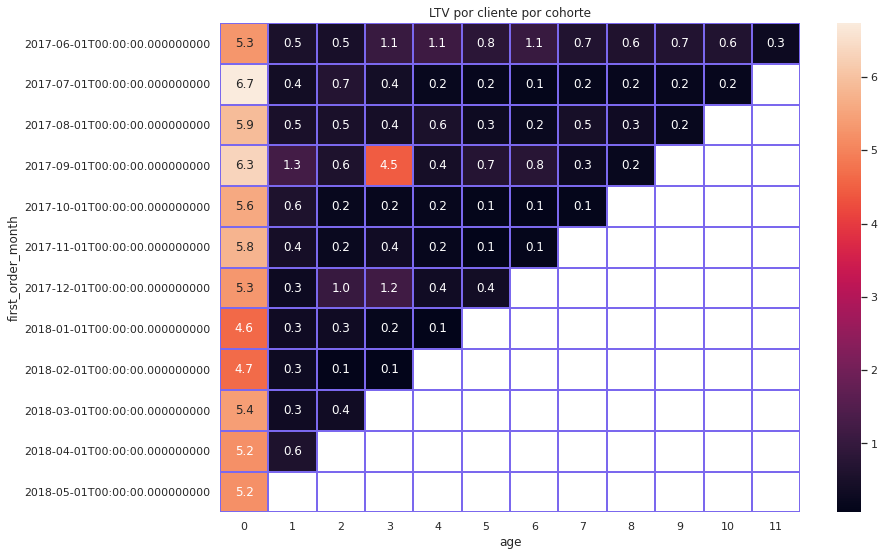

In [51]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
)

print(report.head())
output.fillna('')

plt.figure(figsize=(13, 9))
plt.title('LTV por cliente por cohorte')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidth=1,
    linecolor='mediumslateblue'
)

In [52]:
report['ltv'].mean()

1.255592648843712

- El LTV promedio por usuario es de 1.25 
- En el primer mes de cada cohorte, el LTV promedio es el más alto de todo el ciclo de vida de la cohorte.
- Todas las cohortes en su segundo mes tienen una gran caida en su LTV promedio
- Las únicas cohortes en las que luego de la caida del primer mes hay un incremento considerable en su LTV, son las de Junio, Septiembre y Diciembre del 201

Encontremos el LTV de la primera cohorte sumando el valor de cada mes:

In [53]:
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

13.311065256231622

En promedio, cada cliente de la primera cohorte generó $13.31 en ingresos durante su ciclo de vida de doce meses.

Calculemos el CAC para esta cohorte. Dividiremos los costos del mes de la cohorte por el número de personas:

In [54]:
costs['month'] = costs['dt'].astype('datetime64[M]')
cohort_201706 = report[report['first_order_month'] == '2017-06-01']
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()
n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706 = output.loc['2017-06-01'].sum()

print('CAC:', cac_201706)
print('LTV:', ltv_201706)

CAC: 8.905091448344043
LTV: 13.311065256231622


Vemos que el CAC es menor al LTV, por lo que podemos decir que el negocio está funcionando

Veamos el LTV promedio por mes

In [55]:
output.cumsum(axis=1).mean(axis=0)

age
0      5.509459
1      6.046018
2      6.523527
3      7.496095
4      8.178356
5      8.929581
6      9.398674
7     10.178448
8     11.274890
9     10.366425
10    11.210495
11    13.311065
dtype: float64

Podemos ver que el LTV es mayor para las cohortes que tienen más tiempo, ya que, con el pasar de los meses, el LTV total de cada cohorte se va incrementando

Veamos el LTV por canal

                 ltv
source_id           
1           7.366352
2           2.112704
3          21.134408
4          51.394255
5           7.471377
9           2.934270
10          5.522861


<AxesSubplot:xlabel='source_id'>

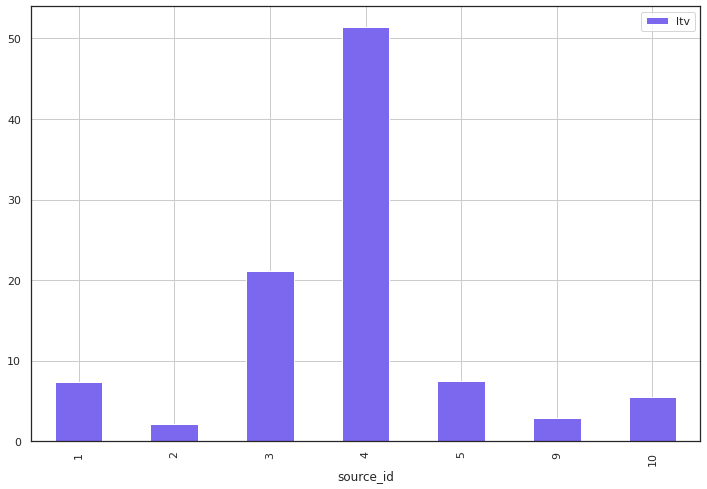

In [56]:
report['source_id'] = visits['source_id']
source_ltv = report.pivot_table(
    index='source_id',
    values='ltv',
    aggfunc='sum'
)

print(source_ltv)
source_ltv.plot(kind='bar', figsize=(12, 8), grid=True, color='mediumslateblue')

Podemos ver que el canal con el mayor LTV, y por mucho, es el número 4

Veamos el LTV por dispositivo

               ltv
device            
desktop  62.672032
touch    35.264195


<AxesSubplot:xlabel='device'>

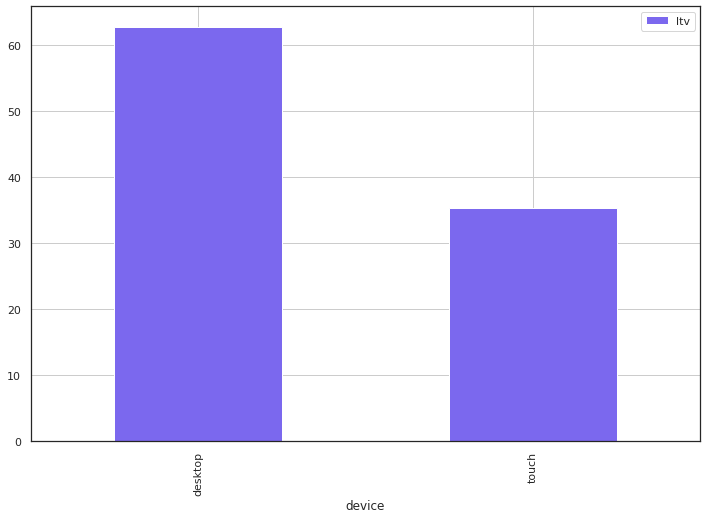

In [57]:
report['device'] = visits['device']
device_ltv = report.pivot_table(
    index='device',
    values='ltv',
    aggfunc='sum'
)

print(device_ltv)
device_ltv.plot(kind='bar', figsize=(12, 8), grid=True, color='mediumslateblue')

Vemos que e LTV de dispositivo descktop es casi el doble del dispositivo touch

# Conclusiones de ventas
- ¿Cuándo la gente empieza a comprar según cohorte y canal de marketing?
    - El tiempo promedio general para que un usuario haga su primera compra es de 17 días.
    - Según el canal de márketing:
        - La fuente con mejor tiempo de conversión promedio es la número 1
        - Las fuentes con el peor tiempo promedio de conversión son las 9 y 10
        - Las fuentes 2, 3, 4 y 5 tienen un tiempo promedio de conversión similar
        - Las fuentes con la mejor eficiencia de conversión son la número 4 y 3, respectivamente.
        - Las fuentes con la peor eficiencia de conversión son la número 1, 9 y 10, respectivamente.
    - Según cohortes:
        - El tiempo promedio de conversión de cada cohorte cada vez es más largo que el de la cohorte anterior
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
    - En cuánto al total de compras realizadas:
        - El mes con menor cantidad de compras tuvo 1807, y fue Agosto del 2017
        - El mes con mayor cantidad de compras tuvo 6218, y fue diciembre del 2017
        - El promedio de compras mensuales es de 4201
    - En cuanto a los ingresos por compras mensuales:
        - El mes con menor cantidad de ingresos totales fue agosto del 2017, con 8.758 y un ingreso promedio por usuario de 4.06
        - El mes con mayor cantidad de ingresos totales fue diciembre del 2017, con 36.388 y un ingreso promedio por usuario de 5.85
        - El promedio de ingresos totales por mes fue de 21.004, y el de ingresos promedios por persona de 4.95
- ¿Cuál es el tamaño promedio de compra por cohorte y por canal?
    - El tamaño promedio de compra por usuario por cohorte es de 14.878613335688675
    - Las cohortes con mayor tamaño promedio de compra son:
        - Septiembre del 2017, con 31.26
        - Diciembre del 2017, con 25.16
        - Junio 2017, con 21.50
    - Las cohortes con menor tamaño promedio de compra son:
        - Febrero del 2018, con 6.16
        - Octubre del 2017, con 7.35.
        - No se considera la cohorte de mayo 2018 ya que solo tiene un mes de vida.
    - Ingresos totales por cohorte:
        - La cohorte que ha generado mayores ingresos totales es la de Junio del 2017, con 40.026. Es la cohorte más antigua.
        - La segunda cohorte con mayores ingresos es la de de Septiembre 2017 con 33.682
        - La tercera cohorte con mayores ingresos es la de de Diciembre del 2017, con 31.158 
        - Las cohortes con menores ingresos totales son las de abril y mayo del 2018, con 9.882 y 10.368, respectivamente. Son las cohortes más recientes con apenas 2 y 1 mes respectivamente.
        - Algo bueno se hizo en mayo, ya que en un solo mes, tiene mayor cantidad de ingresos totales que abril con 2 meses de vida.
        - La cohorte con el mayor tamaño promedio de compra por usuario por cohorte es la de Septiembre del 2017 con 7.75
        - La cohorte con el mayor tamaño promedio de compra por usuario por cohorte es la de Enero del 2018 con 3.76
    - Ingresos promedio por usuario por fuente de anuncios: 
        - La fuente de anuncios que genera más ingresos es la número 1., con 5.34. No consideramos la número 6, ya que solo tiene 1 cliente.
        - Las fuentes de anuncios que generan menos ingresos son la 9 y la 10, con 4.85 y 4.61, respectivamente
    - En cuanto a ingresos totales:
        - La fuente que genera más ingresos es la número 4, con 73.861
        - Las que generan menos ingresos son las número 9 y 10, con 8.963 y 6.315 respectivamente
- ¿Cuánto dinero traen? (LTV)
    - El LTV promedio es de 1.25
    -  LTV es mayor para las cohortes que tienen más tiempo, ya que, con el pasar de los meses, el LTV total de cada cohorte se va incrementando
    - La fuente de anuncios con el mayor LTV es la número 4, con 51.39
    - El dispositivo con el mayor LTV es desktop, con 62.67, frente a touch con 35.26

## Marketing:
Analicemos la tabla costs para responder a las siguientes preguntas:
- ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROI)

In [58]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

#### Cuánto dinero en total se gastó
Veamos cuánto dinero en total se gastó

In [59]:
costs['costs'].sum()

329131.62

La inversión total de márketing es fue de $329.131,62

#### Cuánto dinero se gastó por fuente

Veamos ahora el gasto total por fuente, ordenándolo de forma descendente

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


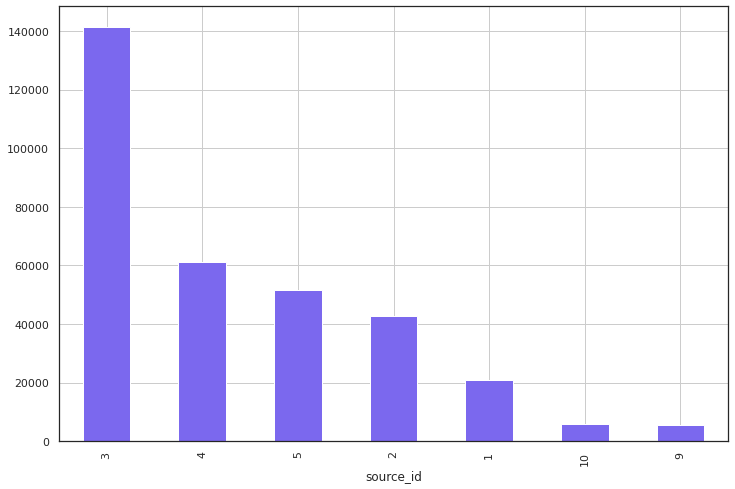

In [60]:
total_costs_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
total_costs_by_source.plot(kind='bar', figsize=(12, 8), grid=True, color='mediumslateblue')
print(total_costs_by_source)

Vemos que la fuente de anuncios en la que más se gastó fue en la número 3, más del doble que la que le sigue (la número 4). Las fuentes con menor inversión fieron la 10 y la 9.

Para ver los gastos a lo largo del tiempo, agruparemos los gastos por mes y los sumaremos para crear la columna monthly_cost

0     18015.00
1     18240.59
2     14790.54
3     24368.91
4     36322.88
5     37907.88
6     38315.35
7     33518.52
8     32723.03
9     30415.27
10    22289.38
11    22224.27
Name: monthly_cost, dtype: float64


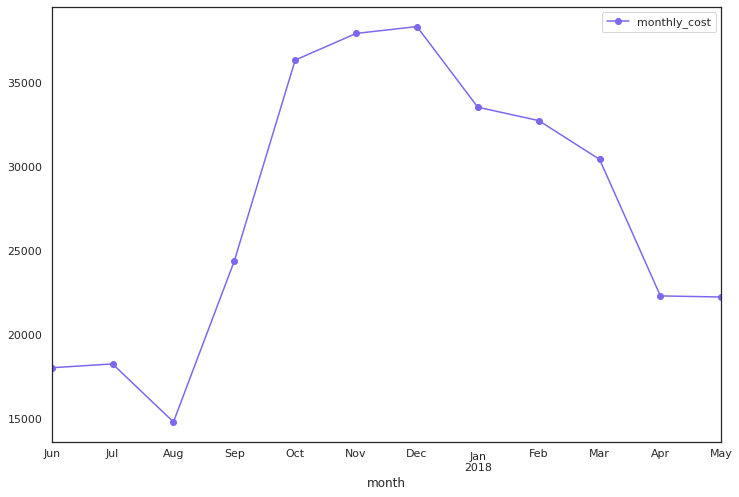

In [61]:
monthly_costs = costs.groupby(['month']).agg({'costs': 'sum'}).reset_index().rename(columns={'costs': 'monthly_cost'})
costs = costs.merge(monthly_costs, on='month', how='left')
costs.pivot_table(
    index='month',
    values='monthly_cost',
).plot(style='o-',figsize=(12, 8), color='mediumslateblue')
print(monthly_costs['monthly_cost'])

- El mes de mayor inversión de marketing fue Diciembre del 2017, con 38.315
- El mes de menor inversión de marketing fue Agosto del 2017, con 14.791

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

Agreguemos los datos sobre los costos, el identificador de la fuente y el dispositivo al informe para calcular el CAC general y detallado:

In [62]:
marketing_report = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
marketing_report['cac'] = marketing_report['monthly_cost'] / marketing_report['n_buyers']
marketing_report['source_id'] = visits['source_id']
marketing_report['device'] = visits['device']
marketing_report

,first_order_month,order_month,revenue,n_buyers,gp,age,ltv,source_id,device,month,monthly_cost,cac
0,2017-06-01,2017-06-01,9557.49,2023,10709.476310,0,5.293859,4,touch,2017-06-01,18015.00,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1100.161029,1,0.543827,2,desktop,2017-06-01,18015.00,8.905091
2,2017-06-01,2017-08-01,885.34,2023,992.052072,2,0.490387,5,touch,2017-06-01,18015.00,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,2164.084043,3,1.069740,9,desktop,2017-06-01,18015.00,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,2317.910718,4,1.145779,3,desktop,2017-06-01,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1191.181868,1,0.337159,4,touch,2018-03-01,30415.27,8.608907
74,2018-03-01,2018-05-01,1114.87,3533,1249.247852,2,0.353594,1,desktop,2018-03-01,30415.27,8.608907
75,2018-04-01,2018-04-01,10600.69,2276,11878.415611,0,5.218988,3,touch,2018-04-01,22289.38,9.793225
76,2018-04-01,2018-05-01,1209.92,2276,1355.754448,1,0.595674,5,desktop,2018-04-01,22289.38,9.793225


Veamos ahora el general y el detalle con gráficos

                  cac       ltv
order_month                    
2017-06-01   8.905091  5.293859
2017-07-01   9.195289  3.639235
2017-08-01   9.728864  2.259503
2017-09-01   9.657062  2.155547
2017-10-01   9.399515  1.784180
2017-11-01   9.381074  1.403457
2017-12-01   9.289750  1.745653
2018-01-01   9.370694  0.859814
2018-02-01   9.325368  0.922088
2018-03-01   9.253722  0.966867
2018-04-01   9.302768  0.701369
2018-05-01   9.147357  0.653412
El CAC promedio mensual es de: 9.32971293583693


<AxesSubplot:xlabel='order_month'>

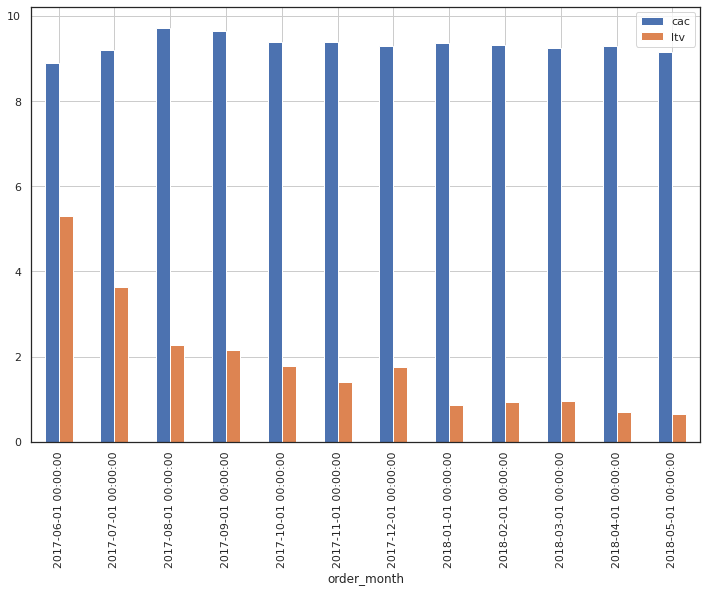

In [63]:
monthly_cac = marketing_report.pivot_table(
    index='order_month',
    values=['ltv', 'cac'],
)
print(monthly_cac)
print('El CAC promedio mensual es de:', (monthly_cac['cac'].sum()) / 12)
monthly_cac.plot(kind='bar', figsize=(12, 8), grid=True)

                cac       ltv
source_id                    
1          8.780542  1.473270
2          9.649708  0.352117
3          9.377711  1.243200
4          9.493579  2.055770
5          9.257382  0.498092
9          9.045452  0.419181
10         8.737399  1.840954
El CAC promedio de todas las fuentes es de: 9.191681846256099


<AxesSubplot:xlabel='source_id'>

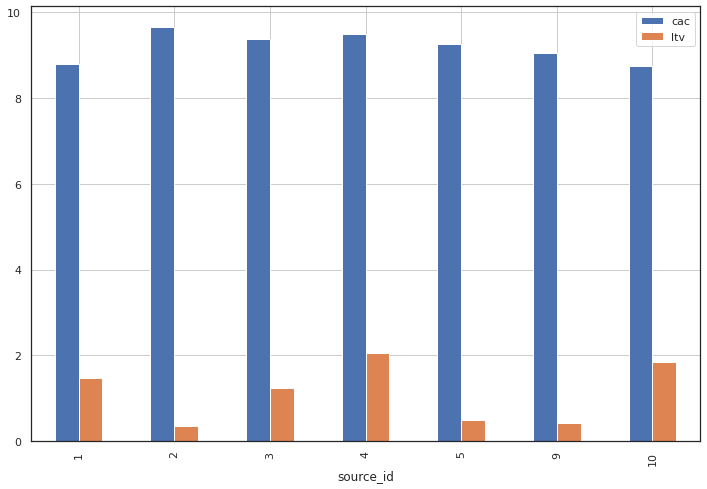

In [64]:
source_cac = marketing_report.pivot_table(
    index='source_id',
    values=['ltv', 'cac'],
)

print(source_cac)
print('El CAC promedio de todas las fuentes es de:', source_cac['cac'].mean())
source_cac.plot(kind='bar', figsize=(12, 8), grid=True)

- El CAC promedio entre todas las fuentes es de El CAC promedio de todas las fuentes es de: 9.19
- La fuente con el CAC más bajo es la núero 10, con 8.74
- La fuente con el CAC más alto es la núero 2, con 9.65

              cac       ltv
device                     
desktop  9.318141  1.139491
touch    9.324124  1.533226


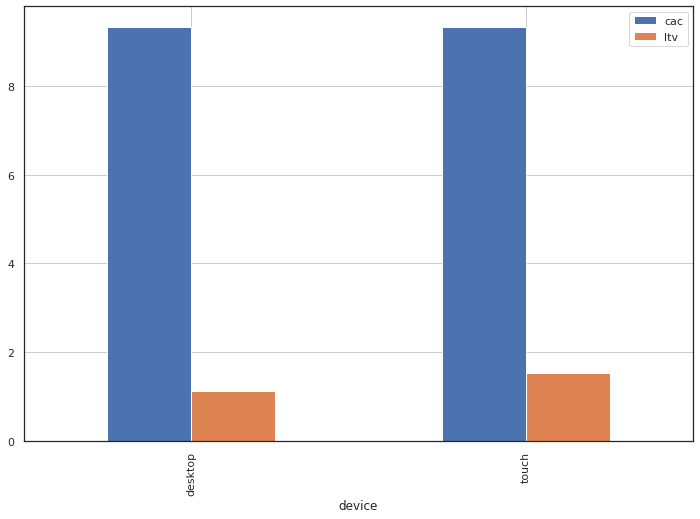

In [65]:
device_cac = marketing_report.pivot_table(
    index='device',
    values=['ltv', 'cac'],
)

device_cac.plot(kind='bar', figsize=(12, 8), grid=True)
print(device_cac)

- El CAC por dispositivo es casi el mismo:
    - desktop  9.3181
    - touch 9.3241

Veamos la cantidad de usuarios para cada dispositivo

In [66]:
users_per_device = visits.groupby('device').agg({'uid': 'nunique'}).reset_index()
users_per_device

,device,uid
0,desktop,164523
1,touch,71345


### ¿Cuán rentables eran las inversiones? (ROMI)

Y ahora busquemos el ROMI (retorno de la inversión en marketing, o return on marketing investment en inglés) dividiendo el LTV por el CAC.

In [67]:
marketing_report['romi'] = marketing_report['ltv'] / marketing_report['cac']
marketing_report_pivot = marketing_report.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

marketing_report_pivot.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.59,0.66,0.71,0.83,0.96,1.05,1.17,1.24,1.31,1.39,1.46,1.49
2017-07-01,0.71,0.75,0.82,0.87,0.89,0.9,0.92,0.94,0.95,0.97,0.99,
2017-08-01,0.55,0.6,0.64,0.68,0.74,0.77,0.79,0.83,0.86,0.88,,
2017-09-01,0.67,0.8,0.86,1.34,1.38,1.46,1.54,1.57,1.59,,,
2017-10-01,0.67,0.74,0.77,0.79,0.81,0.82,0.84,0.85,,,,
2017-11-01,0.62,0.67,0.69,0.73,0.75,0.76,0.77,,,,,
2017-12-01,0.61,0.64,0.76,0.9,0.94,0.98,,,,,,
2018-01-01,0.47,0.5,0.53,0.55,0.56,,,,,,,
2018-02-01,0.52,0.55,0.56,0.57,,,,,,,,


- Solo dos cohortes alcanzaron un ROMI positivo, las de Junio y Septiembre del 2017
- La cohorte de Junio 2017 comenzó a estar en números verdes a partir del sexto mes
- La cohorte de septiembre 2017 comenzó a compensar a partir del cuarto mes

Vamos a averiguar qué tan rápido empiezan a compensar las cohortes en promedio. Para ello, promediaremos el ROMI de todas las cohortes para cada mes de ciclo de vida. Promediaremos los valores en cada columna y convertiremos la tabla en un solo objeto Series con el método mean(axis=0):

In [68]:
marketing_report_pivot.cumsum(axis=1).mean(axis=0)

age
0     0.606001
1     0.652133
2     0.707133
3     0.806492
4     0.877317
5     0.963519
6     1.004915
7     1.086861
8     1.180897
9     1.080739
10    1.226600
11    1.494770
dtype: float64

Según este resultado, podemos decir que, en promedio, las cohortes comienzan a compesar al final del séptimo mes

# Conclusiones de marketing
- ¿Cuánto dinero se gastó?
    - La inversión total de márketing es fue de 329.131,62
    - Por fuente:
        - La fuente de anuncios con mayor inversión fue en la número 3, con 141.322
        - La segunda fuente con mayor inversión fue la número 4, con 61074
        - Las fuentes con menor inversión fueron la 10 y la 9, con 5.822 y 5.517
    - A lo largo del tiempo
        - El mes de mayor inversión de marketing fue Diciembre del 2017, con 38.315
        - El mes de menor inversión de marketing fue Agosto del 2017, con 14.791
- ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?
    - El CAC promedio por mes es de: 9.33
    - El CAC promedio entre todas las fuentes es de El CAC promedio de todas las fuentes es de: 9.19
    - La fuente con el CAC más bajo es la núero 10, con 8.74
    - La fuente con el CAC más alto es la núero 2, con 9.65
    - El CAC por dispositivo es casi el mismo:
        - desktop  9.3181
        - touch 9.3241
- ¿Cuán rentables eran las inversiones?
    - Solo dos cohortes alcanzaron un ROMI positivo:
        - La cohorte de Junio 2017 comenzó a estar en números verdes a partir del sexto mes
        - La cohorte de septiembre 2017 comenzó a compensar a partir del cuarto mes
    - En promedio, las cohortes comienzan a compesar al final del séptimo mes

# Paso 3. Conclusiones: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Luego del análisis realizado, podemos hacer las siguientes recomendaciones:

La fuente en la que se recomienda incrementar la inversión es la número 4, considerando lo siguiente:
- Sin ser la fuente de anuncios en la que mas se invierte actualmente, es la que genra mayor cantidad de usuarios y de ingresos totales. También es la fuente con el mayor LTV.
Para contextualizar esto, en la fuente de anuncios que más se invierte es en la número 3, más del doble de lo uqe se invierte en la 4, y aún así, la fuente número 3 ha generado 11.993 usuarios y tiene un tiempo de conversión promedio de 17.35 días, mientras que la fuente número 4 ha generado 14.314 usuarios con un tiempo promedio de conversión de 17.22 días. Hay una gran oportunidad aquí potenciando la fuente número 4.

En cuanto a las plataformas, se hacen dos recomendaciones:
- Mantener la inversión en desktop, porque es la que tiene mayor cantidad de usuarios.
- Revisar el funcionamiento de la versión movil para corregir cualquier error o detalle que afecte la experiencia de usuario y aumentar la inversión en esta plataforma para mejorar la interfaz e incentivar su uso, ya que, con menos de la mitad de usuarios, tiene un LTV más alto que la plataforma desktop

Recomendaciones adicionales:
- Se apreció que dos de las cohortes con mayor cantidad de ventas e ingresos totales son las de Septiembre y Diciembre del 2017, por lo que se recomienda revisar que fue lo que se hizo en esos meses, ya que tuvo un gran impacto en el aumento de las ventas
- Se recomienda también trabajar en la fidelización y retención de los clientes, y que se pudo apreciar que el LTV y los ingresos totales por cohortes aumentan con el tiempo, y eso con tasas de retención bastante bajas. Con solo unamejora en la tasa de retención, el incremento de las ventas puede ser exponencial. Algunas ideas para esto son promociones y descuentos para usuarios frecuentes, un programa de acumulación de puntos canjeables por beneficios por cada compra que realices en la plataforma, o crear un club de beneficios en el que tengas acceso a descuentos en comercios afiliados mientras te mantengas realizando al menos una compra al mes